<h1> IPL Win Probability

In [1]:
#import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
#import data
matches = pd.read_csv('Data\matches.csv')
deliveries = pd.read_csv('Data\deliveries.csv')

In [3]:
matches.head(2)

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   match_id         1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [5]:
#drop non relevant columns
matches2 = matches.drop(['date','player_of_match','venue','super_over','method','umpire1','umpire2'], axis = 1)
matches2.head(2)

,match_id,season,city,match_type,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs
0,335982,2007/08,Bangalore,League,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0
1,335983,2007/08,Chandigarh,League,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0


In [6]:
deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [7]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [8]:
#lets first find out how much score is made in every inning in every match using the delivery dataset
inningsScore = deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
inningsScore

,match_id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
2212,1426310,2,174
2213,1426311,1,175
2214,1426311,2,139
2215,1426312,1,113


In [9]:
matches2['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [10]:
#we create a seperate list of team that is to be included (teams that are currently playing)

teamlist = ['Sunrisers Hyderabad', 'Mumbai Indians',
            'Royal Challengers Bangalore','Kolkata Knight Riders', 
            'Delhi Capitals', 'Punjab Kings',
            'Chennai Super Kings', 'Rajasthan Royals', 'Gujarat Titans', 'Lucknow Super Giants'
            ]

In [11]:
#we also replace the names of old names 
matches2['team1'] = matches2['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
matches2['team2'] = matches2['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
matches2["toss_winner"] = matches2['toss_winner'].str.replace('Delhi Daredevils','Delhi Capitals')
matches2["winner"] = matches2['winner'].str.replace('Delhi Daredevils','Delhi Capitals')
deliveries['batting_team'] = deliveries['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
deliveries['bowling_team'] = deliveries['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

In [12]:
matches2['team1'] = matches2['team1'].str.replace('Kings XI Punjab','Punjab Kings')
matches2['team2'] = matches2['team2'].str.replace('Kings XI Punjab','Punjab Kings')
matches2["toss_winner"] = matches2['toss_winner'].str.replace('Kings XI Punjab','Punjab Kings')
matches2["winner"] = matches2['winner'].str.replace('Kings XI Punjab','Punjab Kings')
deliveries['batting_team'] = deliveries['batting_team'].str.replace('Kings XI Punjab','Punjab Kings')
deliveries['bowling_team'] = deliveries['bowling_team'].str.replace('Kings XI Punjab','Punjab Kings')

In [13]:
matches2['team1'] = matches2['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches2['team2'] = matches2['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches2["toss_winner"] = matches2['toss_winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches2["winner"] = matches2['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
deliveries['batting_team'] = deliveries['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
deliveries['bowling_team'] = deliveries['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [14]:
matches2 = matches2[matches2['team1'].isin(teamlist)]
matches2 = matches2[matches2['team2'].isin(teamlist)]

In [15]:
matches2['team1'].unique()

array(['Royal Challengers Bangalore', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Sunrisers Hyderabad', 'Chennai Super Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [16]:
matches2.shape

(965, 13)

In [17]:
matches2['result'].value_counts()

result
wickets      504
runs         444
tie           13
no result      4
Name: count, dtype: int64

In [18]:
matches2["target_overs"].value_counts()

target_overs
20.0    937
6.0       4
16.0      3
8.0       3
10.0      3
12.0      3
18.0      2
13.0      2
5.0       2
9.2       1
17.0      1
14.0      1
15.0      1
Name: count, dtype: int64

In [19]:
#we will remove the matches where the number of overs were reduced due to rain
matches2 = matches2[matches2['target_overs'] == 20]

In [20]:
matches2["target_overs"].value_counts()

target_overs
20.0    937
Name: count, dtype: int64

In [21]:
#we will also remove the matches where there was no result
matches2 = matches2[matches2['result'] != 'no result']

In [22]:
matches2['result'].value_counts()

result
wickets    494
runs       429
tie         13
Name: count, dtype: int64

In [23]:
matches2.to_csv('matches2.csv', index=False)
matches2.shape

(936, 13)

In [24]:
initial_matches = matches.shape[0]
final_matches = matches2.shape[0]
print("Data retained after preprocessing = ", (round((final_matches/initial_matches)*100,2)))


Data retained after preprocessing =  85.48


In [25]:
matches2.columns

Index(['match_id', 'season', 'city', 'match_type', 'team1', 'team2',
       'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin',
       'target_runs', 'target_overs'],
      dtype='object')

In [26]:
matches3 = matches2[['match_id','city','winner', 'target_runs']]

In [27]:
deliveries2 = matches3.merge(deliveries, on = 'match_id')
deliveries2

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225615,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
225616,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
225617,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
225618,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [28]:
#now, we will filter out the deliveries bowled in the 2nd innings 
deliveries2 = deliveries2[deliveries2['inning'] == 2]
deliveries2 = deliveries2.drop(['dismissal_kind', 'fielder'], axis= 1)
deliveries2

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed
124,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN
125,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN
126,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,NaN
127,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,NaN
128,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225615,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN
225616,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN
225617,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN
225618,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN


In [29]:
deliveries3 = deliveries2.copy()
deliveries3['current_score'] = deliveries3.groupby('match_id')['total_runs'].cumsum() ## current (live) score of the team
deliveries3['runs_reqd'] = (deliveries3['target_runs'] - deliveries3['current_score']) # runs required to win
deliveries3['balls_left'] = 120 - (deliveries3['over'] * 6 + deliveries3['ball'])
deliveries3

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,...,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,current_score,runs_reqd,balls_left
124,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,1,222.0,119
125,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,R Dravid,0,1,1,wides,0,NaN,2,221.0,118
126,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,R Dravid,0,0,0,NaN,0,NaN,2,221.0,117
127,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,R Dravid,1,0,1,NaN,0,NaN,3,220.0,116
128,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,4,219.0,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225615,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,VR Iyer,1,0,1,NaN,0,NaN,110,4.0,61
225616,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,SS Iyer,1,0,1,NaN,0,NaN,111,3.0,60
225617,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,SS Iyer,1,0,1,NaN,0,NaN,112,2.0,59
225618,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,VR Iyer,1,0,1,NaN,0,NaN,113,1.0,58


In [30]:
#we first replace the NaN values in player_dismissed column with "0" 
deliveries3['player_dismissed'] = deliveries3['player_dismissed'].fillna("0")

#we apply a function to replace the name of the player_dismissed with 1
deliveries3['player_dismissed'] = deliveries3['player_dismissed'].apply(lambda val:val if val == "0" else "1").astype('int')

#convert the values of player_dismissed column to int for counting the wickets fallen
deliveries3['player_dismissed'] = deliveries3['player_dismissed'].astype('int')

deliveries3

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,...,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,current_score,runs_reqd,balls_left
124,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,W Jaffer,1,0,1,NaN,0,0,1,222.0,119
125,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,R Dravid,0,1,1,wides,0,0,2,221.0,118
126,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,R Dravid,0,0,0,NaN,0,0,2,221.0,117
127,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,R Dravid,1,0,1,NaN,0,0,3,220.0,116
128,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,W Jaffer,1,0,1,NaN,0,0,4,219.0,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225615,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,VR Iyer,1,0,1,NaN,0,0,110,4.0,61
225616,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,SS Iyer,1,0,1,NaN,0,0,111,3.0,60
225617,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,SS Iyer,1,0,1,NaN,0,0,112,2.0,59
225618,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,VR Iyer,1,0,1,NaN,0,0,113,1.0,58


In [31]:
#now we find the number of wickets after each ball 
wkt_fall = deliveries3.groupby('match_id')['player_dismissed'].cumsum().values
deliveries3['wkts_left'] = 10 - wkt_fall
deliveries3

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,...,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,current_score,runs_reqd,balls_left,wkts_left
124,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,0,1,NaN,0,0,1,222.0,119,10
125,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,1,1,wides,0,0,2,221.0,118,10
126,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,0,NaN,0,0,2,221.0,117,10
127,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,0,1,NaN,0,0,3,220.0,116,10
128,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,0,1,NaN,0,0,4,219.0,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225615,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,1,0,1,NaN,0,0,110,4.0,61,8
225616,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,1,0,1,NaN,0,0,111,3.0,60,8
225617,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,1,0,1,NaN,0,0,112,2.0,59,8
225618,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,1,0,1,NaN,0,0,113,1.0,58,8


In [32]:
#now, we need to get the runrates - current runrate and required runrate
#c_runrate = runs_scored / number of balls bowled
#r_runrate = runs_reqd / number of balls left
deliveries3['crr'] = round((deliveries3['current_score']/ ((120 - deliveries3['balls_left'])/6)),2)
deliveries3['rrr'] = round(deliveries3['runs_reqd']/ (deliveries3['balls_left']/6),2)
deliveries3

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,...,total_runs,extras_type,is_wicket,player_dismissed,current_score,runs_reqd,balls_left,wkts_left,crr,rrr
124,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,NaN,0,0,1,222.0,119,10,6.00,11.19
125,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,wides,0,0,2,221.0,118,10,6.00,11.24
126,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,0,0,2,221.0,117,10,4.00,11.33
127,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,NaN,0,0,3,220.0,116,10,4.50,11.38
128,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,NaN,0,0,4,219.0,115,10,4.80,11.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225615,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,1,NaN,0,0,110,4.0,61,8,11.19,0.39
225616,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,1,NaN,0,0,111,3.0,60,8,11.10,0.30
225617,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,1,NaN,0,0,112,2.0,59,8,11.02,0.20
225618,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,1,NaN,0,0,113,1.0,58,8,10.94,0.10


In [33]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0
deliveries3['result'] = deliveries3.apply(result,axis=1)
deliveries3

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,...,extras_type,is_wicket,player_dismissed,current_score,runs_reqd,balls_left,wkts_left,crr,rrr,result
124,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,NaN,0,0,1,222.0,119,10,6.00,11.19,0
125,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,wides,0,0,2,221.0,118,10,6.00,11.24,0
126,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,NaN,0,0,2,221.0,117,10,4.00,11.33,0
127,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,NaN,0,0,3,220.0,116,10,4.50,11.38,0
128,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,NaN,0,0,4,219.0,115,10,4.80,11.43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225615,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,NaN,0,0,110,4.0,61,8,11.19,0.39,1
225616,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,NaN,0,0,111,3.0,60,8,11.10,0.30,1
225617,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,NaN,0,0,112,2.0,59,8,11.02,0.20,1
225618,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,NaN,0,0,113,1.0,58,8,10.94,0.10,1


In [34]:
deliveries3['city'] = deliveries3['city'].fillna("unknown")
deliveries3['extras_type'] = deliveries3['extras_type'].fillna("0")
deliveries3 = deliveries3[deliveries3['balls_left'] != 0]
deliveries3

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,...,extras_type,is_wicket,player_dismissed,current_score,runs_reqd,balls_left,wkts_left,crr,rrr,result
124,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,0,0,1,222.0,119,10,6.00,11.19,0
125,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,wides,0,0,2,221.0,118,10,6.00,11.24,0
126,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,0,2,221.0,117,10,4.00,11.33,0
127,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,0,0,3,220.0,116,10,4.50,11.38,0
128,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,0,0,4,219.0,115,10,4.80,11.43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225615,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,0,0,0,110,4.0,61,8,11.19,0.39,1
225616,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,0,0,0,111,3.0,60,8,11.10,0.30,1
225617,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,0,0,0,112,2.0,59,8,11.02,0.20,1
225618,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,0,0,0,113,1.0,58,8,10.94,0.10,1


In [35]:
deliveries3.columns

Index(['match_id', 'city', 'winner', 'target_runs', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket',
       'player_dismissed', 'current_score', 'runs_reqd', 'balls_left',
       'wkts_left', 'crr', 'rrr', 'result'],
      dtype='object')

In [36]:
final_data = deliveries3[['match_id','city','target_runs', 'batting_team',
       'bowling_team','current_score', 'runs_reqd', 'balls_left',
       'wkts_left', 'crr', 'rrr', 'result']]

In [37]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108938 entries, 124 to 225619
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   match_id       108938 non-null  int64  
 1   city           108938 non-null  object 
 2   target_runs    108938 non-null  float64
 3   batting_team   108938 non-null  object 
 4   bowling_team   108938 non-null  object 
 5   current_score  108938 non-null  int64  
 6   runs_reqd      108938 non-null  float64
 7   balls_left     108938 non-null  int64  
 8   wkts_left      108938 non-null  int32  
 9   crr            108938 non-null  float64
 10  rrr            108938 non-null  float64
 11  result         108938 non-null  int64  
dtypes: float64(4), int32(1), int64(4), object(3)
memory usage: 10.4+ MB


In [38]:
n = final_data.shape[0]
final_data.sample(n)

,match_id,city,target_runs,batting_team,bowling_team,current_score,runs_reqd,balls_left,wkts_left,crr,rrr,result
30192,419123,Bangalore,172.0,Chennai Super Kings,Royal Challengers Bangalore,89,83.0,36,5,6.36,13.83,0
93271,829707,Chennai,151.0,Delhi Capitals,Chennai Super Kings,95,56.0,37,6,6.87,9.08,0
117657,1082628,Mumbai,163.0,Mumbai Indians,Royal Challengers Bangalore,35,128.0,100,9,10.50,7.68,1
91420,734037,Kolkata,161.0,Kolkata Knight Riders,Sunrisers Hyderabad,146,15.0,41,5,11.09,2.20,1
4984,336003,Chandigarh,179.0,Kolkata Knight Riders,Punjab Kings,127,52.0,16,5,7.33,19.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
108487,980941,Chandigarh,190.0,Punjab Kings,Mumbai Indians,163,27.0,1,3,8.22,162.00,0
75468,598056,Chandigarh,151.0,Punjab Kings,Sunrisers Hyderabad,100,51.0,21,6,6.06,14.57,0
144934,1178421,Delhi,188.0,Royal Challengers Bangalore,Delhi Capitals,66,122.0,79,9,9.66,9.27,0
76931,598063,Mumbai,167.0,Rajasthan Royals,Mumbai Indians,137,30.0,9,4,7.41,20.00,0


In [39]:
final_data.to_csv('final_data.csv', index=False)
final_data['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'unknown', 'Bengaluru', 'Indore', 'Dubai', 'Sharjah',
       'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

<h2> Data Splitting

In [40]:
X = final_data.iloc[:,:-1]
y = final_data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
X_train


,match_id,city,target_runs,batting_team,bowling_team,current_score,runs_reqd,balls_left,wkts_left,crr,rrr
146391,1178428,Delhi,116.0,Delhi Capitals,Rajasthan Royals,53,63.0,81,8,8.15,4.67
112312,981009,Kolkata,172.0,Sunrisers Hyderabad,Kolkata Knight Riders,117,55.0,26,4,7.47,12.69
43106,501214,Kolkata,82.0,Kolkata Knight Riders,Rajasthan Royals,9,73.0,108,9,4.50,4.06
133050,1136617,Mumbai,140.0,Chennai Super Kings,Sunrisers Hyderabad,25,115.0,92,7,5.36,7.50
70924,598030,Chennai,160.0,Chennai Super Kings,Sunrisers Hyderabad,99,61.0,39,7,7.33,9.38
...,...,...,...,...,...,...,...,...,...,...,...
103648,829801,Raipur,120.0,Delhi Capitals,Chennai Super Kings,21,99.0,100,9,6.30,5.94
203032,1359508,Hyderabad,145.0,Sunrisers Hyderabad,Delhi Capitals,32,113.0,86,9,5.65,7.88
10990,336002,Hyderabad,166.0,Royal Challengers Bangalore,Sunrisers Hyderabad,16,150.0,108,10,8.00,8.33
160932,1216506,Abu Dhabi,154.0,Chennai Super Kings,Punjab Kings,64,90.0,75,10,8.53,7.20


In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

transformer = ColumnTransformer(
    [
        ('categorical',OneHotEncoder(drop='first', sparse_output=False),['city','batting_team','bowling_team'])
        ]
        , remainder = 'passthrough', force_int_remainder_cols=False
) 

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

pipe = Pipeline(
    steps=[
    ('transform1',transformer),
    ('model',LogisticRegression(solver='liblinear'))]
    )

"""
pipe = Pipeline(steps=[
     ('step1',transformer),
     ('step2',RandomForestClassifier())
 ])
 """

"\npipe = Pipeline(steps=[\n     ('step1',transformer),\n     ('step2',RandomForestClassifier())\n ])\n "

In [43]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('transform1',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('categorical',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['city', 'batting_team',
                                                   'bowling_team'])])),
                ('model', LogisticRegression(solver='liblinear'))])

In [44]:
y_pred = pipe.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7684505232237929

In [46]:
pipe.predict_proba(X_train)

array([[0.02201546, 0.97798454],
       [0.65510048, 0.34489952],
       [0.00654681, 0.99345319],
       ...,
       [0.41919105, 0.58080895],
       [0.14937775, 0.85062225],
       [0.98799478, 0.01200522]])

In [47]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['target_runs']))

In [48]:
def match_progression(x,match_id,pipe):
    match = x[x['match_id'] == match_id]
    match = match[match['ball'] == 6]
    temp_match = match[['city','target_runs', 'batting_team',
       'bowling_team','current_score', 'runs_reqd', 'balls_left',
       'wkts_left', 'crr', 'rrr', 'match_id']].dropna()
    temp_match = temp_match[temp_match['balls_left'] != 0]

    result = pipe.predict_proba(temp_match)
    result = result.T #first row is lose probability and second row is win probability at end of each over
    temp_match['lose'] = result[0]*100
    temp_match['win'] = result[1]*100

    total_overs_completed = temp_match.shape[0]
    temp_match['overs_completed'] = range(1,total_overs_completed + 1)

    target = temp_match['target_runs'].values[0]
    temp_match['runs_in_over'] = temp_match['runs_reqd'].shift(1, fill_value=target) - temp_match['runs_reqd']
    temp_match['wickets_in_over'] = temp_match['wkts_left'].shift(1, fill_value=10) - temp_match['wkts_left']
    temp_match['score'] = str(temp_match['current_score']) + '-' + str(10 - temp_match['wkts_left'])
    temp_match['current_wkts'] = 10 - temp_match['wkts_left']

    print("Target -", target)

    temp_match = temp_match[['overs_completed','runs_in_over','wickets_in_over','current_score', 'current_wkts', 'lose', 'win']]

    return target, temp_match




In [53]:
target, match_progress = match_progression(deliveries3,1082622,pipe)
match_progress


Target - 161.0


,overs_completed,runs_in_over,wickets_in_over,current_score,current_wkts,lose,win
116774,1,8.0,0,8,0,30.188429,69.811571
116780,2,10.0,1,18,1,27.647632,72.352368
116786,3,8.0,0,26,1,27.359079,72.640921
116792,4,4.0,0,30,1,33.063270,66.936730
116798,5,6.0,0,36,1,35.784250,64.215750
116804,6,11.0,0,47,1,30.579326,69.420674
116810,7,14.0,0,61,1,21.995558,78.004442
116816,8,19.0,0,80,1,11.239180,88.760820
116822,9,13.0,0,93,1,7.982657,92.017343
116828,10,8.0,0,101,1,7.792088,92.207912


In [50]:
print('actual_result = ', y.loc[X[X['match_id'] == 1082622].index[0]])

actual_result =  1


Text(0.5, 1.0, 'Target -161.0')

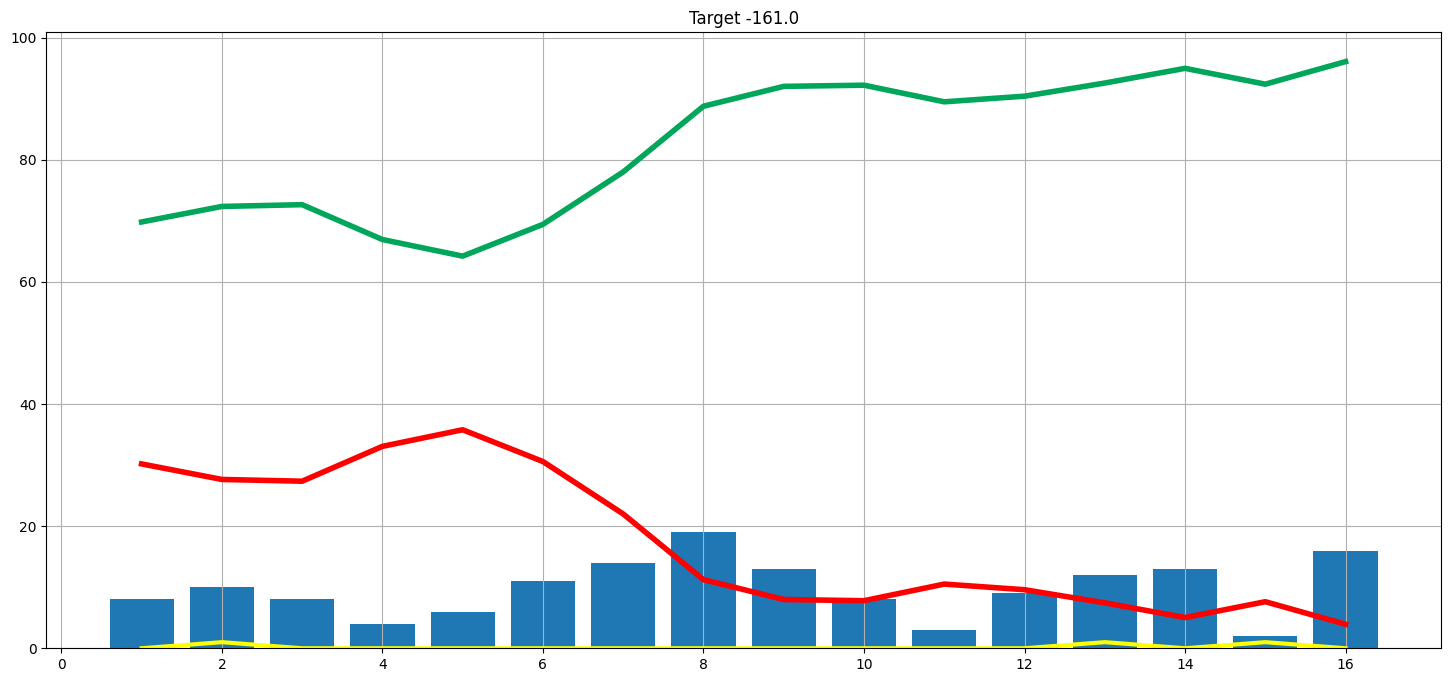

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(match_progress['overs_completed'],match_progress['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(match_progress['overs_completed'],match_progress['win'],color='#00a65a',linewidth=4)
plt.plot(match_progress['overs_completed'],match_progress['lose'],color='red',linewidth=4)
plt.bar(match_progress['overs_completed'],match_progress['runs_in_over'])
plt.title('Target -' + str(target))